In [1]:
# %load /cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/base_imports.py
import pandas as pd
import numpy as np
import tqdm 
import glob
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import re
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import sys
from matplotlib.ticker import ScalarFormatter
sys.path.append(r"/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func")
from config import *
from functions import *
import time

In [2]:
out_df_filtered = pd.read_csv(f'{SAVE_DIR}/{DIR_CSV}/{DIR_OVARIAN}/{NAME_TABLES}/{NAME_FILTERING_OVARIAN}', sep=";",low_memory=False)

In [3]:
out_df_original = pd.read_csv(f'{SAVE_DIR}/{DIR_CSV}/{DIR_OVARIAN}/{NAME_TABLES}/{NAME_NON_FILTERING_OVARIAN}', sep="\t",low_memory=False)

In [4]:
out_df_filtered.insert(loc=4,column='sum',value=out_df_filtered['size_intersection']+out_df_filtered['size_ohsu\eth']+out_df_filtered['size_eth\ohsu'])
second_df=out_df_original[['sample','inter','ohsu_without_eth','eth_without_ohsu']]

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (17).

<Figure size 640x480 with 0 Axes>

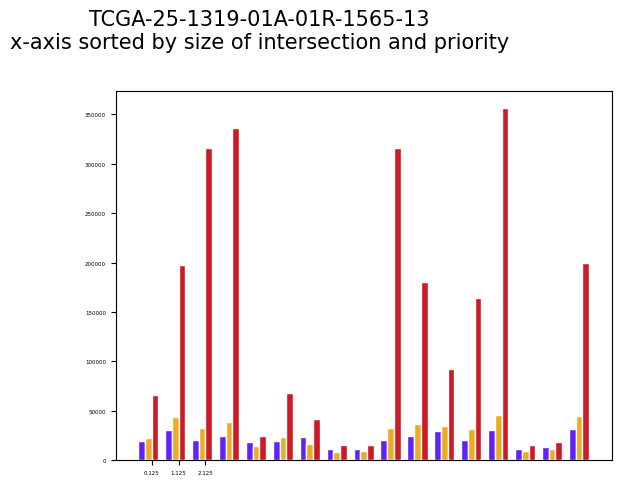

In [8]:
import matplotlib
from matplotlib.ticker import ScalarFormatter
matplotlib.rcParams.update({'font.size':4})
# Definition constants
import math       
        
# Choose necessary data from tables and concatenate filtered & non-filtered cleared tables in one format.

out_df_original.rename(columns={'inter':'size_intersection',
                                'eth_without_ohsu':'size_eth\ohsu',
                                'ohsu_without_eth':'size_ohsu\eth'},inplace=True)
first_df=out_df_filtered
second_df=out_df_original
final_df = first_df
final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_OVARIAN,NAME_TABLES,NAME_FINAL_OVARIAN])

final_df.to_csv(final_path,header=True,sep='\t')

# Processing data and drawing grahs for each sample
for sample in RESTRICTS_OVARIAN:
    # Download colums from tables
    data_df = final_df.loc[(final_df['sample']==sample)]
    data_first=data_df.iloc[:data_df['sample'].count()//2]
    data_second = data_df.iloc[data_df['sample'].count()//2:]
    
    inter_first=list(data_first['size_intersection'])
    s_ETH_first=list(data_first['size_eth\ohsu'])
    s_OHSU_first=list(data_first['size_ohsu\eth'])
    
    inter_second=list(data_second['size_intersection'])
    s_ETH_second=list(data_second['size_eth\ohsu'])
    s_OHSU_second=list(data_second['size_ohsu\eth'])
    
    filter_foreground_first = list(data_first['filter_foreground'])
    filter_background_first = list(data_first['filter_background'])
    filter_foreground_second = list(data_second['filter_foreground'])
    filter_background_second = list(data_second['filter_background'])
    
    inter2=list(second_df['size_intersection'].loc[(second_df['sample']==sample)])
    s_ETH2=list(second_df['size_eth\ohsu'].loc[(second_df['sample']==sample)])
    s_OHSU2=list(second_df['size_ohsu\eth'].loc[(second_df['sample']==sample)])
    filfor2 = ['']
    filbac2 = ['']
    ySalt=''
    
    l=len(s_ETH_first)
    filfor_first = filter_foreground_first
    filfor_second  = filter_foreground_second 
    filbac_first = filter_background_first 
    filbac_second = filter_background_second 
    

    # Combining filters for graph indexing
    
    fffb_first=[]
    for i in range(len(filfor_first)):
          fffb_first.append(filfor_first[i]+' '+filbac_first[i])
       
    fffb_second=[]
    for i in range(len(filfor_second)):
          fffb_second.append(filfor_second[i]+' '+filbac_second[i])
        
    fffb2=[]
    for i in range(len(filfor2)):
          fffb2.append(filfor2[i]+' '+filbac2[i])

    
    # Frame structure building
    name=['kmers from GP\JP','kmers from intersection','kmers from JP\GP']
    v_first=[s_ETH_first,inter_first,s_OHSU_first]
    v_second=[s_ETH_second,inter_second,s_OHSU_second]
    
    
    axis2 = {
            'kmers from GP\JP':s_ETH2,
            'kmers from intersection':inter2,
            'kmers from JP\GP':s_OHSU2
            }
    
    lg = len(filfor_first)
    lg2 = len(filfor2)
    
    #Plotting sample data
    x_main = filfor_first
    x_secondary_first = filbac_first
    x_secondary2 = filbac2
    
    plt.figure()


    bottom_first =np.zeros(lg)
    bottom2 =np.zeros(lg2)
    bar_width=0.5
    bar_position_ETH_first = range(len(v_first))

    bar_position_ETH2 = range(len(axis2['kmers from GP\JP']))
    salt = SALT = PLOT_SORT_BY

    path_sample_absolut =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, sample,'kmers', SALT,PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY+PNG])
    path_sample_absolut_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, sample,'kmers', SALT,PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY+PDF])
    path_sample_nf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, sample,'kmers', SALT,PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_NF+PNG])
    path_sample_nf_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, sample,'kmers', SALT,PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_NF+PDF])

    draw_plot.plotting_filtering_barplot(s_ETH_first,v_first,name,bottom_first,bar_position_ETH_first,sample,filfor_first,x_secondary_first,salt,path_sample_absolut,path_sample_absolut_pdf)
    
    draw_plot.plotting_nf_barplot(axis2,fffb2,bottom2,sample,path_sample_nf,path_sample_nf_pdf)

PERCENT PLOT

In [ ]:
for sample in restricts:
    inter=np.array(final_df['inter'].loc[(final_df['sample']==sample)])
    s_ETH=np.array(final_df['eth_without_ohsu'].loc[(final_df['sample']==sample)])
    s_OHSU=np.array(final_df['ohsu_without_eth'].loc[(final_df['sample']==sample)])
    filter_foreground = list(out_df_filtered['filter_foreground'].loc[(out_df_filtered['sample']==sample)])
    filter_background = list(out_df_filtered['filter_background'].loc[(out_df_filtered['sample']==sample)])
    
    snum = inter+s_ETH+s_OHSU

    inter = inter/snum*100.
    s_ETH = s_ETH/snum*100.
    s_OHSU = s_OHSU/snum*100.

    axis = {
            'size_eth\ohsu':s_ETH,
            'size_intersection':inter,
            'size_ohsu\eth':s_OHSU
            }
    l=len(s_ETH)
    
    filfor = []
    filbac = []   
    
    for ff in filter_foreground:
        filter_sample=re.findall(PATTERN,re.findall(SAMPLE_PATTERN,ff)[0])[0]
        filter_cohorlim=re.findall(PATTERN,re.findall(COHORTLIM_PATTERN,ff)[0])[0]
        filter_across=re.findall(PATTERN,re.findall(ACROSS_PATTERN,ff)[0])[0]
        
        filfor.append(f'({filter_sample}, {filter_cohorlim}, {filter_across})')
        
    for fb in filter_background:
        filter_cohorlim=re.findall(PATTERN,re.findall(COHORTLIM_PATTERN,fb)[0])[0]
   
        filter_across=re.findall(PATTERN,re.findall(ACROSS_PATTERN,fb)[0])[0]

        filbac.append(f'({filter_cohorlim}, {filter_across})')
        
    filfor.append('non')
    filbac.append('filtered')
    
    fffb=[]
    for i in range(len(filfor)):
          fffb.append(filfor[i]+' '+filbac[i])
        
    lg = len(filfor)
    
    x_main = filfor
    x_secondary = filbac
    plt.figure(figsize=(16, 9))

    fig,ax = plt.subplots()
    
    x = filfor
    bottom =np.zeros(lg)
    # stack bars
    for data, data_count in axis.items():
            p = ax.bar(fffb,data_count,label=data,bottom=bottom)
            bottom+=data_count


    # add text annotation corresponding to the percentage of each data.
    for xpos, ypos, yval in zip(fffb, s_ETH/2, s_ETH):
        plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center",size=3)
    for xpos, ypos, yval in zip(fffb, s_ETH+inter/2, inter):
        plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center",size=3)
    for xpos, ypos, yval in zip(fffb, s_ETH+inter+s_OHSU/2, s_OHSU):
        plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center",size=3)
    # add text annotation corresponding to the "total" value of each bar
    for xpos, ypos, yval in zip(fffb, s_ETH+inter+s_OHSU, snum):
        plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom",size=3)

    plt.ylim(0,110)


    ax.set_xticks([pos+bar_width/2 for pos in bar_position_ETH])
    ax.set_xticklabels(filfor,rotation=90,ha='center')
    ax.set_xlabel('Filter foreground')
    ax.set_ylabel('Percents')
    ax.set_title(sample)
    
    plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')
    
    ax_sec = ax.secondary_xaxis('top')
    ax_sec.set_xticks([pos+bar_width/2 for pos in bar_position_ETH])
    ax_sec.set_xticklabels(x_secondary,rotation=90,ha='center')
    ax_sec.set_xlabel('Filter background')
    

    plt.tight_layout()
    SALT = f"sorted by {PLOT_SORT_BY}"
    path_sample =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, sample, SALT, NAME_PLOT_PERCENT_PRETTY]) 
    plt.savefig(path_sample, bbox_inches='tight', pad_inches=0.02, dpi=300)
    plt.show()